# Stock Prediction 

##### take stcok prize of any company you want and predicts its price by using LSTM use only jupyter notebook

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('tataglobel.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [4]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data.shape

(1235, 8)

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


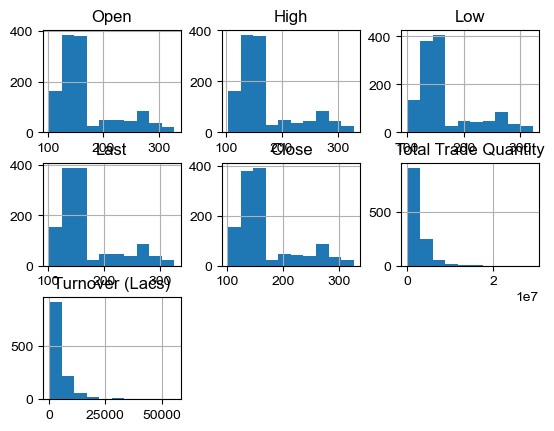

In [7]:
data.hist()
sns.set(rc={'figure.figsize':(20,7)})

In [8]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [9]:
srt=data.sort_values(by='Date')

In [10]:
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1176,01-01-2014,160.85,162.65,159.90,160.35,160.5,1958707,3160.15
932,01-01-2015,150.95,151.75,150.35,150.50,150.7,535692,809.15
684,01-01-2016,146.05,148.80,145.50,146.40,146.4,781067,1148.71
189,01-01-2018,317.75,317.80,311.80,313.45,312.9,1602814,5040.75
664,01-02-2016,126.80,128.30,125.20,126.60,126.6,592819,752.61


In [11]:
pd.to_datetime(srt['Date'])

C:\Users\Ashutosh Rawat\AppData\Local\Temp\ipykernel_12852\3440995476.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(srt['Date'])


1176   2014-01-01
932    2015-01-01
684    2016-01-01
189    2018-01-01
664    2016-01-02
          ...    
973    2014-10-31
232    2017-10-31
1177   2013-12-31
933    2014-12-31
685    2015-12-31
Name: Date, Length: 1235, dtype: datetime64[ns]

In [12]:
srt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 1176 to 685
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 86.8+ KB


In [13]:
srt.reset_index(inplace=True)

In [14]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1176,01-01-2014,160.85,162.65,159.90,160.35,160.5,1958707,3160.15
1,932,01-01-2015,150.95,151.75,150.35,150.50,150.7,535692,809.15
2,684,01-01-2016,146.05,148.80,145.50,146.40,146.4,781067,1148.71
3,189,01-01-2018,317.75,317.80,311.80,313.45,312.9,1602814,5040.75
4,664,01-02-2016,126.80,128.30,125.20,126.60,126.6,592819,752.61


In [15]:
srt.shape

(1235, 9)

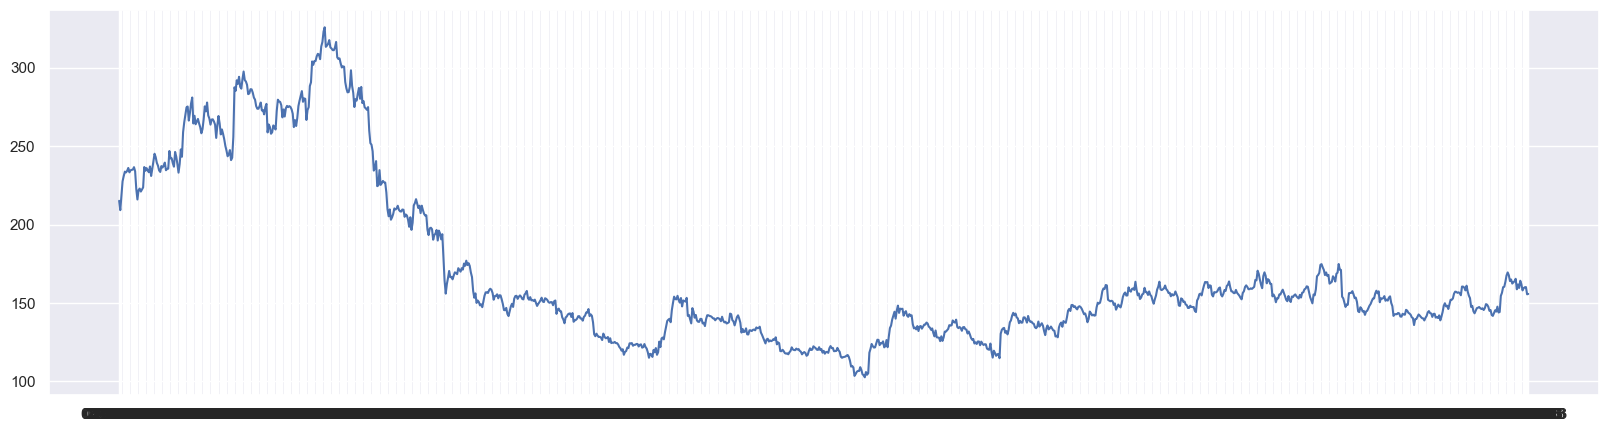

In [16]:
plt.figure(figsize=(20,5))
plt.plot(data['Date'],data['Close'])

In [17]:

srt.isnull().sum()

index                   0
Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [18]:
close_srt=srt['Close']
close_srt


0       160.50
1       150.70
2       146.40
3       312.90
4       126.60
         ...  
1230    160.10
1231    226.95
1232    160.45
1233    150.95
1234    146.20
Name: Close, Length: 1235, dtype: float64

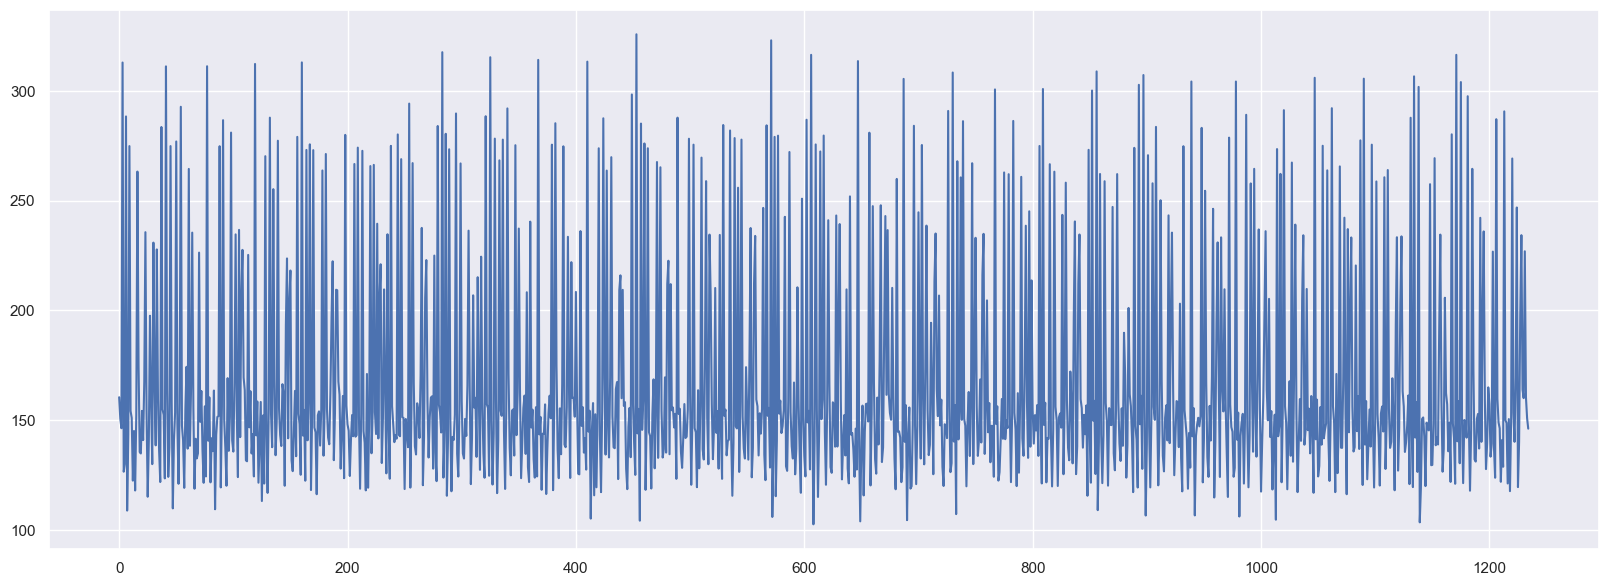

In [19]:
plt.plot(close_srt)

### Feature Scaling (MinMax Scaler)

In [20]:
from sklearn.preprocessing import MinMaxScaler


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt=scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.25930076],
       [0.21537427],
       [0.1961004 ],
       ...,
       [0.25907665],
       [0.21649485],
       [0.19520394]])

### Splitting the dataset

In [22]:
train_size=int(len(close_srt)*0.7)
test_size=len(close_srt)-train_size
train_data,test_data=close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]


In [23]:
train_data.shape

(864, 1)

In [24]:
test_data.shape

(371, 1)

### Convert array of values into a dataset matrix

In [25]:
def create_dataset (dataset ,time_step=1):
    dataX ,dataY =[],[]
    for i in range (len(dataset)-time_step-1):
        a =dataset [i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

###  Reshaping of dataset

In [26]:
time_step=100
X_train,y_train=create_dataset(train_data ,time_step)
X_test,y_test=create_dataset(test_data, time_step)

In [27]:
print(X_train.shape),print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [28]:
print(X_test.shape) , print(y_test.shape)

(270, 100)
(270,)


(None, None)

In [29]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
X_train

array([[[0.25930076],
        [0.21537427],
        [0.1961004 ],
        ...,
        [0.21940834],
        [0.7994173 ],
        [0.17122367]],

       [[0.21537427],
        [0.1961004 ],
        [0.94240251],
        ...,
        [0.7994173 ],
        [0.17122367],
        [0.14836396]],

       [[0.1961004 ],
        [0.94240251],
        [0.10735096],
        ...,
        [0.17122367],
        [0.14836396],
        [0.28686688]],

       ...,

       [[0.45696997],
        [0.18780816],
        [0.24742268],
        ...,
        [0.0289108 ],
        [0.16741372],
        [0.71492604]],

       [[0.18780816],
        [0.24742268],
        [0.12662483],
        ...,
        [0.16741372],
        [0.71492604],
        [0.18377409]],

       [[0.24742268],
        [0.12662483],
        [0.20103093],
        ...,
        [0.71492604],
        [0.18377409],
        [0.08404303]]])

In [31]:
X_test

array([[[0.24742268],
        [0.21066786],
        [0.07888839],
        ...,
        [0.41057822],
        [0.57530255],
        [0.27835052]],

       [[0.21066786],
        [0.07888839],
        [0.2371134 ],
        ...,
        [0.57530255],
        [0.27835052],
        [0.09659346]],

       [[0.07888839],
        [0.2371134 ],
        [0.20304796],
        ...,
        [0.27835052],
        [0.09659346],
        [0.58561183]],

       ...,

       [[0.82967279],
        [0.18556701],
        [0.0759749 ],
        ...,
        [0.59009413],
        [0.27498879],
        [0.25750784]],

       [[0.18556701],
        [0.0759749 ],
        [0.91416405],
        ...,
        [0.27498879],
        [0.25750784],
        [0.55714926]],

       [[0.0759749 ],
        [0.91416405],
        [0.17705065],
        ...,
        [0.25750784],
        [0.55714926],
        [0.25907665]]])

### Creating the stacked LSTM Model

In [32]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 4s 163ms/step - loss: 0.0770 - val_loss: 0.0547
Epoch 2/60
11/11 [==============================] - 1s 91ms/step - loss: 0.0574 - val_loss: 0.0559
Epoch 3/60
11/11 [==============================] - 1s 90ms/step - loss: 0.0552 - val_loss: 0.0545
Epoch 4/60
11/11 [==============================] - 1s 93ms/step - loss: 0.0546 - val_loss: 0.0538
Epoch 5/60
11/11 [==============================] - 1s 93ms/step - loss: 0.0540 - val_loss: 0.0537
Epoch 6/60
11/11 [==============================] - 1s 92ms/step - loss: 0.0541 - val_loss: 0.0536
Epoch 7/60
11/11 [==============================] - 1s 90ms/step - loss: 0.0544 - val_loss: 0.0539
Epoch 8/60
11/11 [==============================] - 1s 90ms/step - loss: 0.0551 - val_loss: 0.0536
Epoch 9/60
11/11 [==============================] - 1s 89ms/step - loss: 0.0550 - val_loss: 0.0538
Epoch 10/60
11/11 [==============================] - 1s 89ms/step - loss: 0.0542 - val_loss: 0.0535
Epoch 11

### Predicting

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 18ms/step


In [37]:
trian_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### calcualting the performance

In [38]:
import math as mt
from sklearn.metrics import mean_squared_error

In [39]:
mt.sqrt(mean_squared_error(y_train,train_predict))

0.22162062904055962

In [40]:
mt.sqrt(mean_squared_error(y_test,test_predict))

179.03794971067182

#### Plotting the graph with predicted train data, test data with actual data

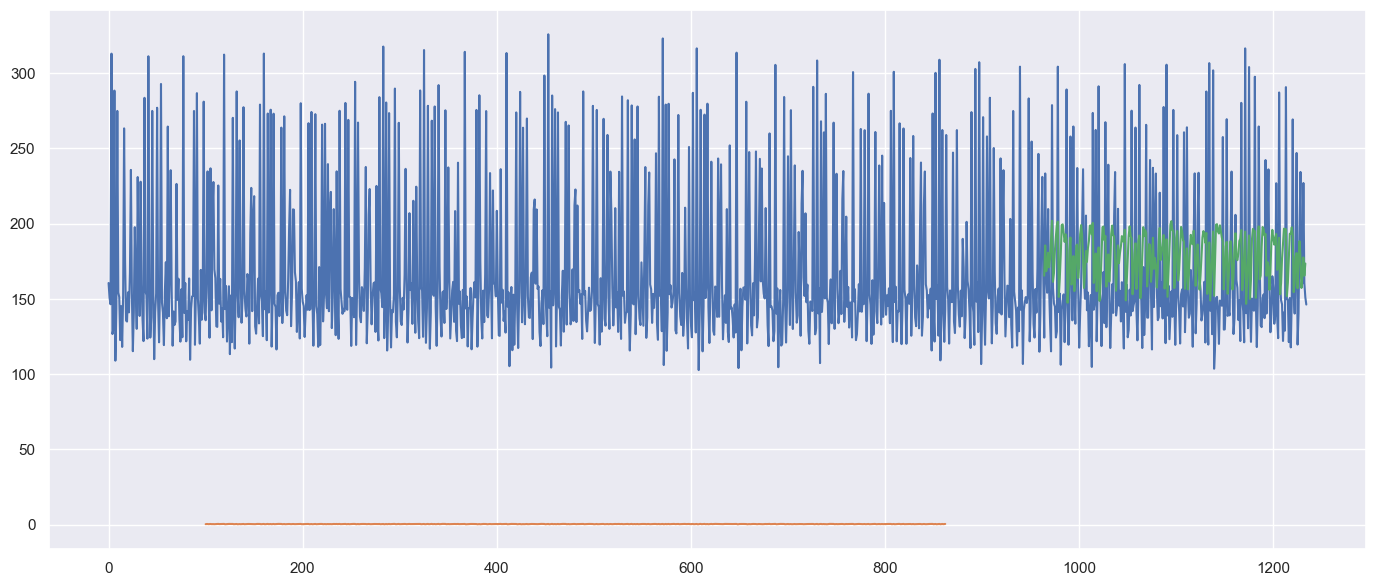

In [41]:
look_back=100

# shift train predictions for plotting
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

# shift test predictions for ploting
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :]=test_predict

# plot baseline and predictions
plt.figure(figsize=(17,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


### Prediction for next 30 days

In [42]:
len(test_data)

371

In [43]:
pred_input=test_data[271:].reshape(1,-1)
pred_input.shape

(1, 100)

In [44]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.1770506499327656,
 0.2492155983863738,
 0.10690273419991031,
 0.8926490363065889,
 0.0040340654415060295,
 0.07463021066786196,
 0.2149260421335723,
 0.21806364858807709,
 0.1788435679067683,
 0.07799193186911696,
 0.207306140744061,
 0.19542805916629308,
 0.19161810847153743,
 0.694083370685791,
 0.12057373375168084,
 0.12124607799193182,
 0.2055132227700583,
 0.7471985656656208,
 0.161362617660242,
 0.1770506499327656,
 0.1629314208874944,
 0.3930972658000896,
 0.5912147019273868,
 0.2525773195876288,
 0.10735096369341096,
 0.15396683101748093,
 0.46234872254594356,
 0.2678171223666517,
 0.2449574181981175,
 0.14903630658897354,
 0.207306140744061,
 0.08650829224562978,
 0.7958314657104437,
 0.20618556701030927,
 0.17593007619901385,
 0.08269834155087402,
 0.9580905423576869,
 0.16943074854325407,
 0.25123263110712674,
 0.12460779919318682,
 0.9025100851636036,
 0.21111609143881666,
 0.08404303003137609,
 0.21290900941281937,
 0.2097714029583146,
 0.17682653518601515,
 0.873599282